# <center> 04. Problemas de clasificación </center>

In [0]:
import numpy                   as     np
import matplotlib.pyplot       as plt

from   sklearn.datasets        import load_digits
from   sklearn.neighbors       import KNeighborsClassifier
from   sklearn.svm             import SVC
from   sklearn.ensemble        import RandomForestClassifier
from   sklearn.naive_bayes     import GaussianNB
from   sklearn.metrics         import classification_report, confusion_matrix
from   sklearn.model_selection import train_test_split
from   sklearn.metrics         import accuracy_score
from   sklearn.model_selection import cross_val_score
from   sklearn.metrics         import make_scorer


Nuestros algoritmos de aprendizage automatio necesitan datos para operar. Vamos a importar un conjunto de datos clasicos de **sklearn**

In [0]:
data = load_digits()

In [0]:
data.DESCR

".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixel

In [0]:
clases = data.target_names

print('Nuestras clases a predecir son:')

for i, clase in enumerate(clases):

  print('clase ' + str(i) + ': ' + str(clase))


Nuestras clases a predecir son:
clase 0: 0
clase 1: 1
clase 2: 2
clase 3: 3
clase 4: 4
clase 5: 5
clase 6: 6
clase 7: 7
clase 8: 8
clase 9: 9


(1797, 8, 8)
imagenes en el dataset: 1797
con dimension:  (8, 8)


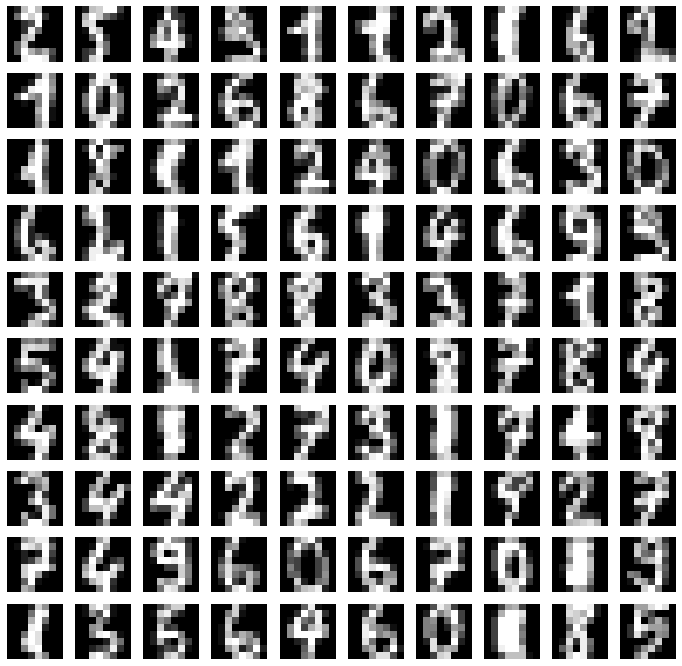

In [0]:
imagenes = data.images
print(np.shape(imagenes))
print('imagenes en el dataset: ' + str(len(imagenes)))
print('con dimension: ', np.shape(imagenes[1]))

plt.figure(figsize=(12,12))

for i in range(100):

  plt.subplot(10,10,i+1)
  plt.axis('off')
  indice = np.random.randint(len(imagenes))
  plt.imshow(imagenes[indice], cmap='gray')


In [0]:
X = data.data
y = data.target
print('Datos de entrenamiento: ',np.shape(X), 'Etiquetas: ',np.shape(y))

Datos de entrenamiento:  (1797, 64) Etiquetas:  (1797,)


### Nuestros datos estan cargados. Ahora ¡entrenemos!

In [0]:
modeloDeVecinos = KNeighborsClassifier()
modeloDeVecinos.fit(X,y)


print('El modelo dice que es un :' ,modeloDeVecinos.predict(X[:1,:]), ' y realmente es: ', y[0])



El modelo dice que es un : [0]  y realmente es:  0


Muy bonito y todo pero ¿como medimos que tan bien aprendio?

In [0]:
predichos = modeloDeVecinos.predict(X)

print('Precision del modelo: ', np.sum(predichos == y)/len(y))
print('Precision del modelo: ', modeloDeVecinos.score(X,y))

Precision del modelo:  0.9905397885364496
Precision del modelo:  0.9905397885364496


# ¿esto está correcto?

In [0]:
mitad  = int(np.shape(X)[0]/2)

XTrain = X[:mitad,:]
XTest  = X[mitad:,:]
yTrain = y[:mitad]
yTest  = y[mitad:]

print('Entrenamiento: ',np.shape(XTrain),np.shape(yTrain))
print('Prueba: ',np.shape(XTest),np.shape(yTest))

Entrenamiento:  (898, 64) (898,)
Prueba:  (899, 64) (899,)


In [0]:
modeloDeVecinos = KNeighborsClassifier()
modeloDeVecinos.fit(XTrain,yTrain)

predichos = modeloDeVecinos.predict(XTest)

print('Precision del modelo: ', np.sum(predichos == yTest)/len(yTest))
print('Precision del modelo: ', modeloDeVecinos.score(XTest,yTest))

Precision del modelo:  0.9555061179087876
Precision del modelo:  0.9555061179087876


# Mucho mejor 

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
print('Entrenamiento: ',np.shape(X_train),np.shape(y_train))
print('Prueba: ',np.shape(X_test),np.shape(y_test))

Entrenamiento:  (898, 64) (898,)
Prueba:  (899, 64) (899,)


In [0]:
modeloDeVecinos = KNeighborsClassifier()
modeloDeVecinos.fit(X_train,y_train)

predichos = modeloDeVecinos.predict(X_test)

print('Precision del modelo: ', np.sum(predichos == y_test)/len(y_test))
print('Precision del modelo: ', modeloDeVecinos.score(X_test,y_test))

Precision del modelo:  0.9877641824249166
Precision del modelo:  0.9877641824249166


## ¿Es lo mismo?¿por que?

In [0]:
s = cross_val_score(modeloDeVecinos, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print('Precision en la fase de train:',np.mean(s), np.std(s))

Precision en la fase de train: 0.986092489137182 0.010034447479084802


Ahora que sabemos medir el trabajo que realizan los clasificadores probemos con los demas.

In [0]:
modeloDeSupport = SVC()

s = cross_val_score(modeloDeSupport, XTrain, yTrain, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
print('Precision en la fase de train:',np.mean(s), np.std(s))

modeloDeSupport.fit(X_train, y_train)
modeloDeSupport.score(X_test,y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default 

Precision en la fase de train: 0.26730602110490376 0.017237066588937647


0.2936596218020022

In [0]:
modeloDeForest = RandomForestClassifier()

s = cross_val_score(modeloDeForest, XTrain, yTrain, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
print('Precision en la fase de train:',np.mean(s), np.std(s))

modeloDeForest.fit(X_train, y_train)
modeloDeForest.score(X_test,y_test)

Precision en la fase de train: 0.9297827436374921 0.027822428387021224


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

0.9377085650723026

In [0]:
modeloDeGaussian = GaussianNB()

s = cross_val_score(modeloDeGaussian, XTrain, yTrain, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
print('Precision en la fase de train:',np.mean(s), np.std(s))

modeloDeGaussian.fit(X_train, y_train)
modeloDeGaussian.score(X_test,y_test)

Precision en la fase de train: 0.8397082557417754 0.043606195395200074


0.8231368186874305

## Revise la documentacion de **Sklearn** para el casificadores con peor precision y varie sus parametros para tratar de mejorar su puntaje

In [0]:
#Su codigo aqui.

## Pruebe los clasificadores que hemos aprendido con los diferentes datasets que hemos trabajado.

In [0]:
#Su codigo aqui.

# <center> Muchas gracias por su atención </center>